<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment4_Q2_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# RAJIT_BASU_20MAI0019
# GitHub Link

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_Assignment4_Q2_20MAI0019.ipynb

In [3]:
# Import all libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train_path = '/content/drive/MyDrive/covid19/train'
valid_path = '/content/drive/MyDrive/covid19/test'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/covid19/train/*')
print(folders)

['/content/drive/MyDrive/covid19/train/COVID19', '/content/drive/MyDrive/covid19/train/PNEUMONIA']


In [9]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# compile model
model.compile(
  loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
)

In [13]:
# Image Augmentation 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid19/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid19/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
7/7 [==============================] - 124s 14s/step - loss: 10.4612 - accuracy: 0.4595 - val_loss: 15.7958 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 8s 1s/step - loss: 13.8381 - accuracy: 0.5314 - val_loss: 12.6022 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 8s 1s/step - loss: 13.7519 - accuracy: 0.5112 - val_loss: 18.9978 - val_accuracy: 0.5000
Epoch 4/5
7/7 [==============================] - 8s 1s/step - loss: 11.1046 - accuracy: 0.5636 - val_loss: 11.9590 - val_accuracy: 0.5000
Epoch 5/5
7/7 [==============================] - 8s 1s/step - loss: 12.6072 - accuracy: 0.5090 - val_loss: 25.6635 - val_accuracy: 0.5000


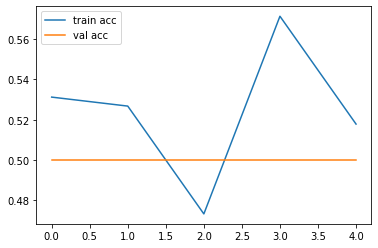

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

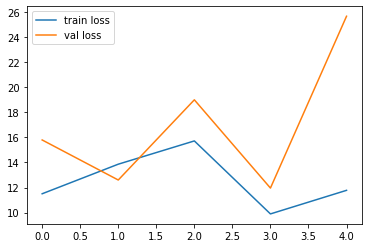

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [20]:
# save model
import tensorflow as tf

from keras.models import load_model

model.save('covid_vgg16.h5')